# Is making song an art or science?

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.dummy import DummyClassifier

from sklearn.metrics import confusion_matrix, recall_score, accuracy_score

from sklearn.pipeline import Pipeline

from sklearn.decomposition import PCA, KernelPCA

%pylab inline

## Checking the VIFs to assess dependence of all X variables
from statsmodels.stats.outliers_influence import variance_inflation_factor

Populating the interactive namespace from numpy and matplotlib


In [3]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)

In [4]:
df_10 = pd.read_csv('dataset-of-10s.csv')
df = pd.read_csv('dataset-of-00s.csv')
df_90 = pd.read_csv('dataset-of-90s.csv')
df_80 = pd.read_csv('dataset-of-80s.csv')
df_70 = pd.read_csv('dataset-of-70s.csv')
df_60 = pd.read_csv('dataset-of-60s.csv')

In [5]:
df_10['year'] = 2010
df['year']    = 2000
df_90['year'] = 1990
df_80['year'] = 1980
df_70['year'] = 1970
df_60['year'] = 1960

In [6]:
past_data = pd.concat([df, df_90, df_80, df_70, df_60], axis = 0)
future_data = df_10

In [7]:
df.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Lucky Man,Montgomery Gentry,spotify:track:4GiXBCUF7H6YfNQsnBRIzl,0.578,0.471,4,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,4,30.88059,13,1,2000
1,On The Hotline,Pretty Ricky,spotify:track:1zyqZONW985Cs4osz9wlsu,0.704,0.854,10,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,4,41.51106,10,1,2000
2,Clouds Of Dementia,Candlemass,spotify:track:6cHZf7RbxXCKwEkgAZT4mY,0.162,0.836,9,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,4,65.32887,13,0,2000
3,"Heavy Metal, Raise Hell!",Zwartketterij,spotify:track:2IjBPp2vMeX7LggzRN3iSX,0.188,0.994,4,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,4,58.59528,9,0,2000
4,I Got A Feelin',Billy Currington,spotify:track:1tF370eYXUcWwkIvaq3IGz,0.630,0.764,2,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,4,22.62384,10,1,2000


In [8]:
df_90.head()

,track,artist,uri,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,target,year
0,Misty Roses,Astrud Gilberto,spotify:track:50RBM1j1Dw7WYmsGsWg9Tm,0.527,0.316,1,-15.769,1,0.0310,0.693000,0.00699,0.1680,0.543,116.211,158840,4,53.89523,6,0,1990
1,Never Ever,All Saints,spotify:track:5FTz9qQ94PyUHETyAyfYZN,0.738,0.541,1,-5.485,1,0.0311,0.559000,0.00000,0.0492,0.309,134.187,387573,4,32.16853,16,1,1990
2,Soul Sermon,Gregg Karukas,spotify:track:6m24oe3lk1UMxq9zq4iPFi,0.736,0.419,0,-10.662,1,0.0300,0.693000,0.49500,0.0809,0.265,93.982,237267,4,42.05369,9,0,1990
3,Clarinet Marmalade - Live,Alton Purnell,spotify:track:5FOXuiLI6knVtgMUjWKj6x,0.565,0.594,5,-13.086,1,0.0646,0.655000,0.92600,0.6750,0.763,114.219,375933,4,80.99693,10,0,1990
4,До смерті і довше - Drum & Base and Rock Remix,Skryabin,spotify:track:6CxyIPTqSPvAPXfrIZczs4,0.513,0.760,4,-10.077,1,0.0355,0.000017,0.00339,0.1530,0.961,153.166,430653,4,25.57331,20,0,1990


Number of Rows

In [9]:
len(df)

5872

In [10]:
len(df_90)

5520

In [11]:
len(df_80)

6908

In [12]:
len(df_70)

7766

In [13]:
#check na - in complete df
sum(df.isna().apply(sum, axis = 0))

0

In [14]:
sum(df_90.isna().apply(sum, axis = 0))

0

In [15]:
sum(df_80.isna().apply(sum, axis = 0))

0

Base Rate

In [16]:
df['target'].mean()

0.5

In [17]:
df_90['target'].mean()

0.5

# EDA

## Is there relation between the notes you use the most in your song and probability of song's success?

<AxesSubplot:xlabel='key', ylabel='count'>

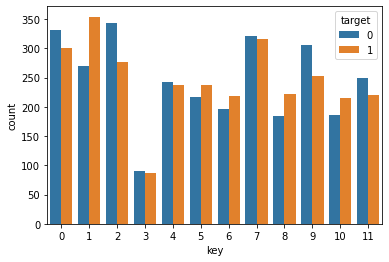

In [18]:
sns.countplot(data = df, x = "key", hue = "target")

No

## Is there a "holy grail" song duration that increases chances of success?

(0.0, 14.0)

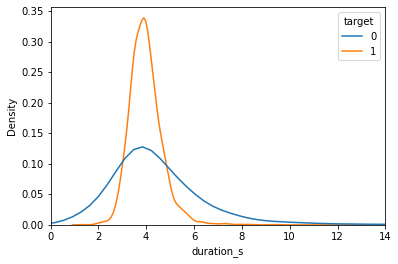

In [19]:
df['duration_s'] = df['duration_ms']/60000
sns.kdeplot(data = df, x = "duration_s", hue = "target")
plt.xlim(0,14)

Yes.
Anything out of the range of (2, 6) min has a low chance of success

## Do dance numbers have higher chances of being hit?

<AxesSubplot:xlabel='target', ylabel='danceability'>

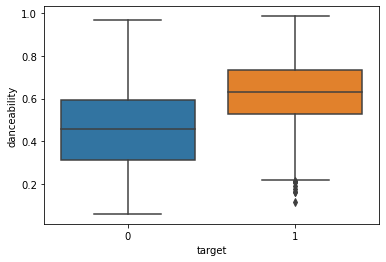

In [20]:
sns.boxplot(data = df, y = "danceability", x = "target")

<AxesSubplot:xlabel='danceability', ylabel='Density'>

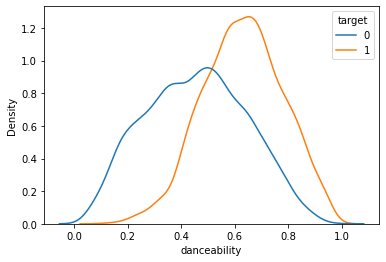

In [21]:
sns.kdeplot(data = df, x = "danceability", hue = "target")

Definitely, there some relation between dancability and song's chances of being a hit

## Do loud and high energy songs have a higher chance of being a hit?

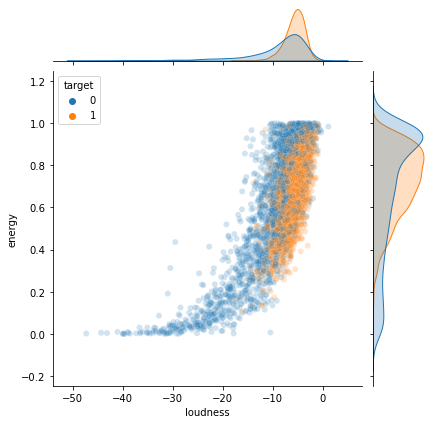

In [22]:
sns.jointplot(data = df, x = 'loudness', y = 'energy', hue='target', alpha= 0.2)

Some combinations definitely have higher chances of being a hit than others

## When should you put in your chorus to garauntee success?

<AxesSubplot:xlabel='chorus_perc', ylabel='Density'>

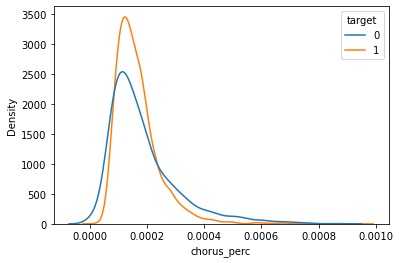

In [23]:
df['chorus_perc'] = df['chorus_hit'] / df['duration_ms'] 
sns.kdeplot(data = df, x = 'chorus_perc', hue = 'target')

No clear differentiation. Singer seem to be adding their chorus at the same time

## Are hit singers born or made?

In [24]:
artist_hit_stat = df.groupby('artist')['target'].agg(['mean', 'count'])
artist_hit_stat = artist_hit_stat[artist_hit_stat['count'] > 2]

<AxesSubplot:xlabel='mean', ylabel='Count'>

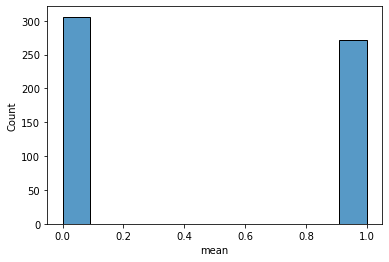

In [25]:
sns.histplot(artist_hit_stat, x = 'mean')

So acc. to this data, if your first song was not a hit then there are zero chances of song being a hit.

## top 10 artist from 2000-2010

In [26]:
artist = df[['artist', 'target']]
artist.groupby('artist').sum().sort_values('target', ascending = False)[:10]

,target
artist,
Toby Keith,27
Rascal Flatts,24
Tim McGraw,24
Kenny Chesney,23
George Strait,22
Brad Paisley,20
Keith Urban,20
Britney Spears,19
Alan Jackson,19


## Acousticness

<AxesSubplot:xlabel='acousticness', ylabel='Density'>

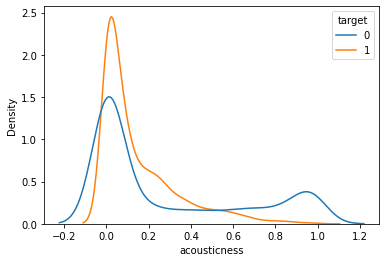

In [27]:
sns.kdeplot(data = df, x = "acousticness", hue = "target")

## Do people songs heavy on vocal  or songs heavy on instrumentation?

<AxesSubplot:xlabel='instrumentalness', ylabel='Density'>

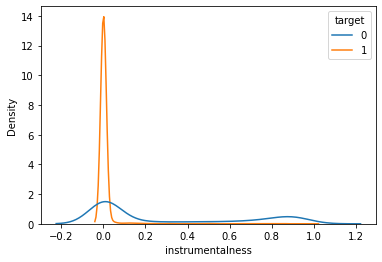

In [28]:
 sns.kdeplot(data = df, x = "instrumentalness", hue = "target")

All hits seem to be vocals

## Energy

<AxesSubplot:xlabel='energy', ylabel='Density'>

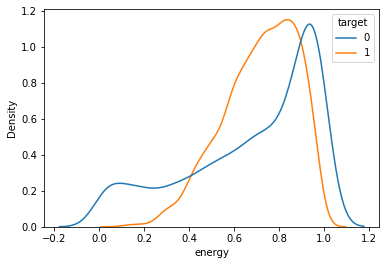

In [29]:
 sns.kdeplot(data = df, x = "energy", hue = "target")

## Valence

<AxesSubplot:xlabel='valence', ylabel='Density'>

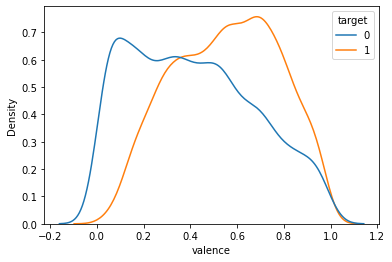

In [30]:
 sns.kdeplot(data = df, x = "valence", hue = "target")

More positive (happy, cheerful) songs are tend to be hits

## Sections

<AxesSubplot:xlabel='sections', ylabel='Density'>

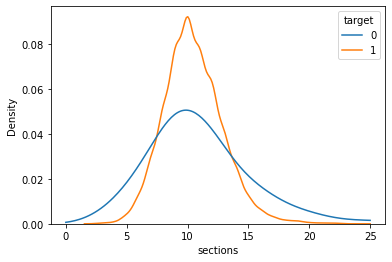

In [31]:
 sns.kdeplot(data = df, x = "sections", hue = "target", clip=(0, 25))

<AxesSubplot:xlabel='sections', ylabel='Density'>

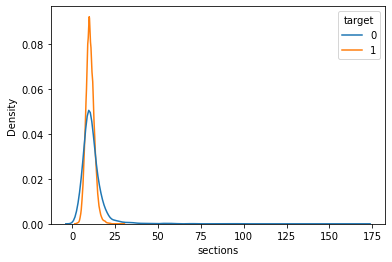

In [32]:
 sns.kdeplot(data = df, x = "sections", hue = "target")

In [33]:
sum(df['sections'] > 50)

16

long tail for non-hits <br> RS - May be we can remove this there are only few outliers here. clipping looks to be a smart startegy.

## Mode

<AxesSubplot:xlabel='mode', ylabel='count'>

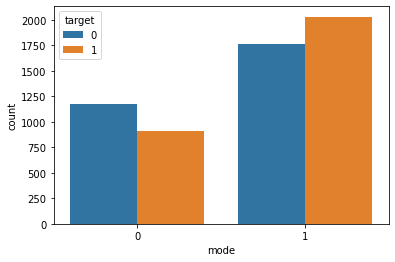

In [34]:
sns.countplot(data = df, x = "mode", hue = "target")

# Feature Engineering

In [35]:
len(past_data)

34708

In [36]:
len(past_data.columns)

20

In [37]:
future_data = future_data.drop('uri', axis=1)
past_data = past_data.drop('uri', axis=1)

In [38]:
#drop useless column
df_10 = df_10.drop('uri', axis=1)

In [39]:
#drop useless column
df = df.drop('uri', axis=1)

In [40]:
#drop useless column
df_90 = df_90.drop('uri', axis=1)

In [41]:
#drop useless column
df_80 = df_80.drop('uri', axis=1)

In [42]:
#drop useless column
df_70 = df_70.drop('uri', axis=1)

In [43]:
#drop useless column
df_60 = df_60.drop('uri', axis=1)

## Non-linear transformation

In [44]:
past_data.skew(numeric_only=True)

danceability       -0.241069
energy             -0.237053
key                 0.010260
loudness           -1.327244
mode               -0.884232
speechiness         5.265221
acousticness        0.361695
instrumentalness    1.767475
liveness            2.103627
valence            -0.261231
tempo               0.515838
duration_ms         6.910646
time_signature     -3.512362
chorus_hit          2.252175
sections            6.174832
target              0.000000
year                0.231594
dtype: float64

<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

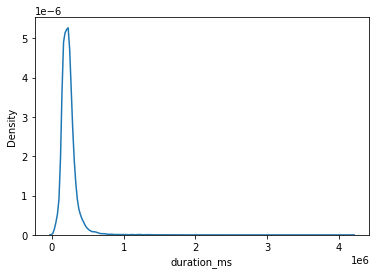

In [45]:
sns.kdeplot(data = past_data, x = 'duration_ms')

let's remove outliers

In [46]:
past_data = past_data[past_data['duration_ms'] < 1000000]

In [47]:
len(past_data)

34579

<AxesSubplot:xlabel='loudness', ylabel='Density'>

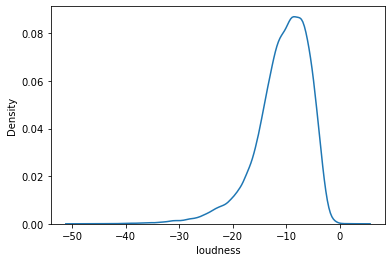

In [48]:
sns.kdeplot(data = past_data, x = 'loudness')

In [49]:
past_data = past_data[past_data['loudness'] > -30]

In [50]:
past_data.skew(numeric_only=True)

danceability       -0.231576
energy             -0.225268
key                 0.011390
loudness           -0.931562
mode               -0.887749
speechiness         5.233987
acousticness        0.376027
instrumentalness    1.812166
liveness            2.097668
valence            -0.266080
tempo               0.521033
duration_ms         1.995689
time_signature     -3.562240
chorus_hit          1.973897
sections            1.873986
target             -0.020439
year                0.232588
dtype: float64

## Categorical one hot encoding

In [51]:
#create a copy of df 
df_copy = df.copy()

In [52]:
#one hot encode categorical columns
categorical_columns = ['key', 'time_signature']
for col in categorical_columns:
  encoded = pd.get_dummies(df_copy [col],prefix = str(col), drop_first=True)
  df_copy = df_copy.join(encoded)
  df_copy = df_copy.drop(col, axis=1)
df_copy = df_copy[[c for c in df_copy if c not in ['target']] 
       + ['target']]
df_copy.head(5)

,track,artist,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,chorus_hit,sections,year,duration_s,chorus_perc,key_1,key_2,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_1,time_signature_3,time_signature_4,time_signature_5,target
0,Lucky Man,Montgomery Gentry,0.578,0.471,-7.270,1,0.0289,0.368000,0.00000,0.159,0.532,133.061,196707,30.88059,13,2000,3.278450,0.000157,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
1,On The Hotline,Pretty Ricky,0.704,0.854,-5.477,0,0.1830,0.018500,0.00000,0.148,0.688,92.988,242587,41.51106,10,2000,4.043117,0.000171,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1
2,Clouds Of Dementia,Candlemass,0.162,0.836,-3.009,1,0.0473,0.000111,0.00457,0.174,0.300,86.964,338893,65.32887,13,2000,5.648217,0.000193,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,"Heavy Metal, Raise Hell!",Zwartketterij,0.188,0.994,-3.745,1,0.1660,0.000007,0.07840,0.192,0.333,148.440,255667,58.59528,9,2000,4.261117,0.000229,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
4,I Got A Feelin',Billy Currington,0.630,0.764,-4.353,1,0.0275,0.363000,0.00000,0.125,0.631,112.098,193760,22.62384,10,2000,3.229333,0.000117,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1


In [53]:
#more columns were added
df_copy.shape

(5872, 34)

## VIF: To check interdependence of X variables

In [54]:
vif_df_int = past_data[['danceability','energy','loudness','speechiness',
                      'acousticness','instrumentalness','liveness',
                      'valence','tempo','duration_ms','chorus_hit']]

## Creating and storing in a dataframe
vif_df = pd.DataFrame({ 'columns': vif_df_int.columns,
                          'VIF': [variance_inflation_factor(vif_df_int.to_numpy(), i) for i in range(len(vif_df_int.columns))]
                      })
vif_df.sort_values('VIF', ascending= False).head(10)

,columns,VIF
8,tempo,15.907980
0,danceability,15.333495
1,energy,14.995816
7,valence,10.454157
2,loudness,10.356997
9,duration_ms,7.198074
10,chorus_hit,5.438812
4,acousticness,3.734565
6,liveness,2.555816
3,speechiness,1.813366


In [55]:
correlated_features = vif_df.loc[vif_df['VIF']>5, 'columns'].tolist()
correlated_features

['danceability',
 'energy',
 'loudness',
 'valence',
 'tempo',
 'duration_ms',
 'chorus_hit']

may drop these highly correlated columns

In [56]:
df.columns

Index(['track', 'artist', 'danceability', 'energy', 'key', 'loudness', 'mode',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'time_signature', 'chorus_hit',
       'sections', 'target', 'year', 'duration_s', 'chorus_perc'],
      dtype='object')

In [57]:
y = df['target']
X = df.drop(['target', 'track', 'artist', 'energy'], axis=1)

In [58]:
y_70 = df_70['target']
X_70 = df_70.drop(['target', 'track', 'artist', 'energy'], axis=1)

In [59]:
y_80 = df_80['target']
X_80 = df_80.drop(['target', 'track', 'artist', 'energy'], axis=1)

In [60]:
y_90 = df_90['target']
X_90 = df_90.drop(['target', 'track', 'artist', 'energy'], axis=1)

In [61]:
y_test = future_data['target']
X_test = future_data.drop(['target', 'track', 'artist', 'energy'], axis=1)

In [62]:
y_train = past_data['target']
X_train = past_data.drop(['target', 'track', 'artist', 'energy'], axis=1)

In [63]:
len(X_train)

34349

In [64]:
len(X_train.columns)

15

# Modelling with Pipeline

In [65]:
#label : classifier
classifiers = {
    'Dummy Classifier - Baseline - ': DummyClassifier(),
    'decision tree':       DecisionTreeClassifier(max_depth = 15),
    'pruned decision tree':DecisionTreeClassifier(max_depth = 12, ccp_alpha = 0.0009),
    'KNN with k=10':       KNeighborsClassifier(n_neighbors=10),
    'KNN with k=15':       KNeighborsClassifier(n_neighbors=15),
    'Gaussian NB':         GaussianNB(var_smoothing=1e-3),
    'random forest':       RandomForestClassifier(ccp_alpha=0.001, max_depth = 15),
    'random forest smaller':RandomForestClassifier(ccp_alpha=0.001, max_depth = 10),
    'xgb':                 XGBClassifier(eta = 0.4, eval_metric = 'error'),
    'logistic regression': LogisticRegression(C = 1),    
}

## Cross validation to find the best model 

In [66]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    scores = cross_val_score(pipeline, X_train, y_train)
    print(label, scores.mean())

Dummy Classifier - Baseline -  0.5051093207611863
decision tree 0.7189424757729546
pruned decision tree 0.7354206174482195
KNN with k=10 0.7374874735193007
KNN with k=15 0.7366433672536339
Gaussian NB 0.6933529222168328
random forest 0.752450985939191
random forest smaller 0.7521015985791915
xgb 0.7775471640937714
logistic regression 0.7188258706341148


## All datasets used to predict 2010-2019 song hits

In [67]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    
    pipeline.fit(X_train, y_train)
    score = pipeline.score(X_test, y_test)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.7539856205064083
pruned decision tree 0.7450765864332604
KNN with k=10 0.762582056892779
KNN with k=15 0.7597686777117849
Gaussian NB 0.7116286339481088
random forest 0.7907158487027196
random forest smaller 0.7899343544857768
xgb 0.794467020944045
logistic regression 0.7366364488902782


In [68]:
xgb = XGBClassifier(eta = 0.4, eval_metric = 'error')
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))

[[2366  833]
 [ 482 2717]]
0.794467020944045
0.8493279149734292


In [69]:
rf = RandomForestClassifier(ccp_alpha=0.001, max_depth = 15)
rf.fit(X_train, y_train)
predictions = rf.predict(X_test)
print(confusion_matrix(y_test, predictions))
print(accuracy_score(y_test, predictions))
print(recall_score(y_test, predictions))

[[2179 1020]
 [ 325 2874]]
0.7897780556423882
0.8984057517974366


## 1990-1999 dataset used to predict 2010-2019 song hits

In [70]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    
    pipeline.fit(X_90, y_90)
    score = pipeline.score(X_test, y_test)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.706939668646452
pruned decision tree 0.7166301969365426
KNN with k=10 0.7331978743357299
KNN with k=15 0.7338230697092841
Gaussian NB 0.7377305407939981
random forest 0.7416380118787121
random forest smaller 0.7428884026258206
xgb 0.7497655517349172
logistic regression 0.73210378243201


## 1980-1989 dataset used to predict 2010-2019 song hits

In [71]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    
    pipeline.fit(X_80, y_80)
    score = pipeline.score(X_test, y_test)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.6608315098468271
pruned decision tree 0.6641137855579868
KNN with k=10 0.6788058768365114
KNN with k=15 0.6820881525476712
Gaussian NB 0.6805251641137856
random forest 0.6925601750547046
random forest smaller 0.6983432322600813
xgb 0.6997499218505783
logistic regression 0.6936542669584245


## 1970-1979 dataset used to predict 2010-2019 song hits

In [72]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    
    pipeline.fit(X_70, y_70)
    score = pipeline.score(X_test, y_test)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.6278524538918412
pruned decision tree 0.7350734604563927
KNN with k=10 0.6744295092216318
KNN with k=15 0.6767739918724601
Gaussian NB 0.6741169115348546
random forest 0.7596123788683964
random forest smaller 0.7528915286026884
xgb 0.7105345420443888
logistic regression 0.6883401062832135


## 1980-1989 dataset used to predict 1990-1999 song hits

In [73]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    
    pipeline.fit(X_80, y_80)
    score = pipeline.score(X_90, y_90)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.7248188405797101
pruned decision tree 0.7425724637681159
KNN with k=10 0.7344202898550725
KNN with k=15 0.7365942028985507
Gaussian NB 0.7009057971014493
random forest 0.7742753623188405
random forest smaller 0.775
xgb 0.7592391304347826
logistic regression 0.75


## 1970-1979 dataset used to predict 1980-1989 song hits

In [74]:
for label, clf in classifiers.items():
    pipeline = Pipeline(steps= [('scaler', StandardScaler()),
                               ('classifier', clf),])
    
    pipeline.fit(X_70, y_70)
    score = pipeline.score(X_80, y_80)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.6980312680949624
pruned decision tree 0.7278517660683266
KNN with k=10 0.7132310364794441
KNN with k=15 0.7010712217718588
Gaussian NB 0.6978865083960626
random forest 0.7495657209033005
random forest smaller 0.746670526925304
xgb 0.7392877822814129
logistic regression 0.7271279675738275


# Insights

<AxesSubplot:>

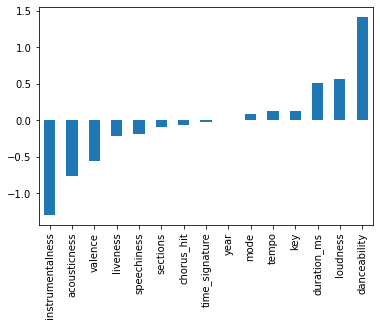

In [75]:
X = X_90
y = y_90

pipeline = Pipeline(steps= [('scaler', StandardScaler()), ('classifier', LogisticRegression(C = 1)),])
pipeline.fit(X, y)

pd.Series(index = X.columns.values, 
          data = pipeline['classifier'].coef_.tolist()[0]).\
                    sort_values().\
                    plot(kind = 'bar')

<AxesSubplot:>

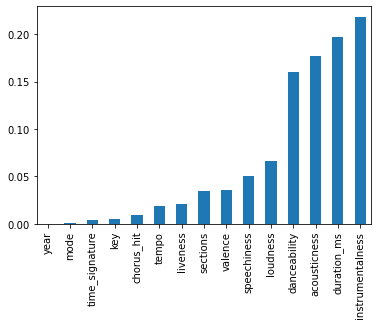

In [76]:
pipeline = Pipeline(steps= [('scaler', StandardScaler()), 
                 ('classifier', RandomForestClassifier(ccp_alpha=0.001, max_depth = 15))])
pipeline.fit(X, y)

pd.Series(index = X.columns.values, 
          data = pipeline['classifier'].feature_importances_.tolist()).\
                    sort_values().\
                    plot(kind = 'bar')

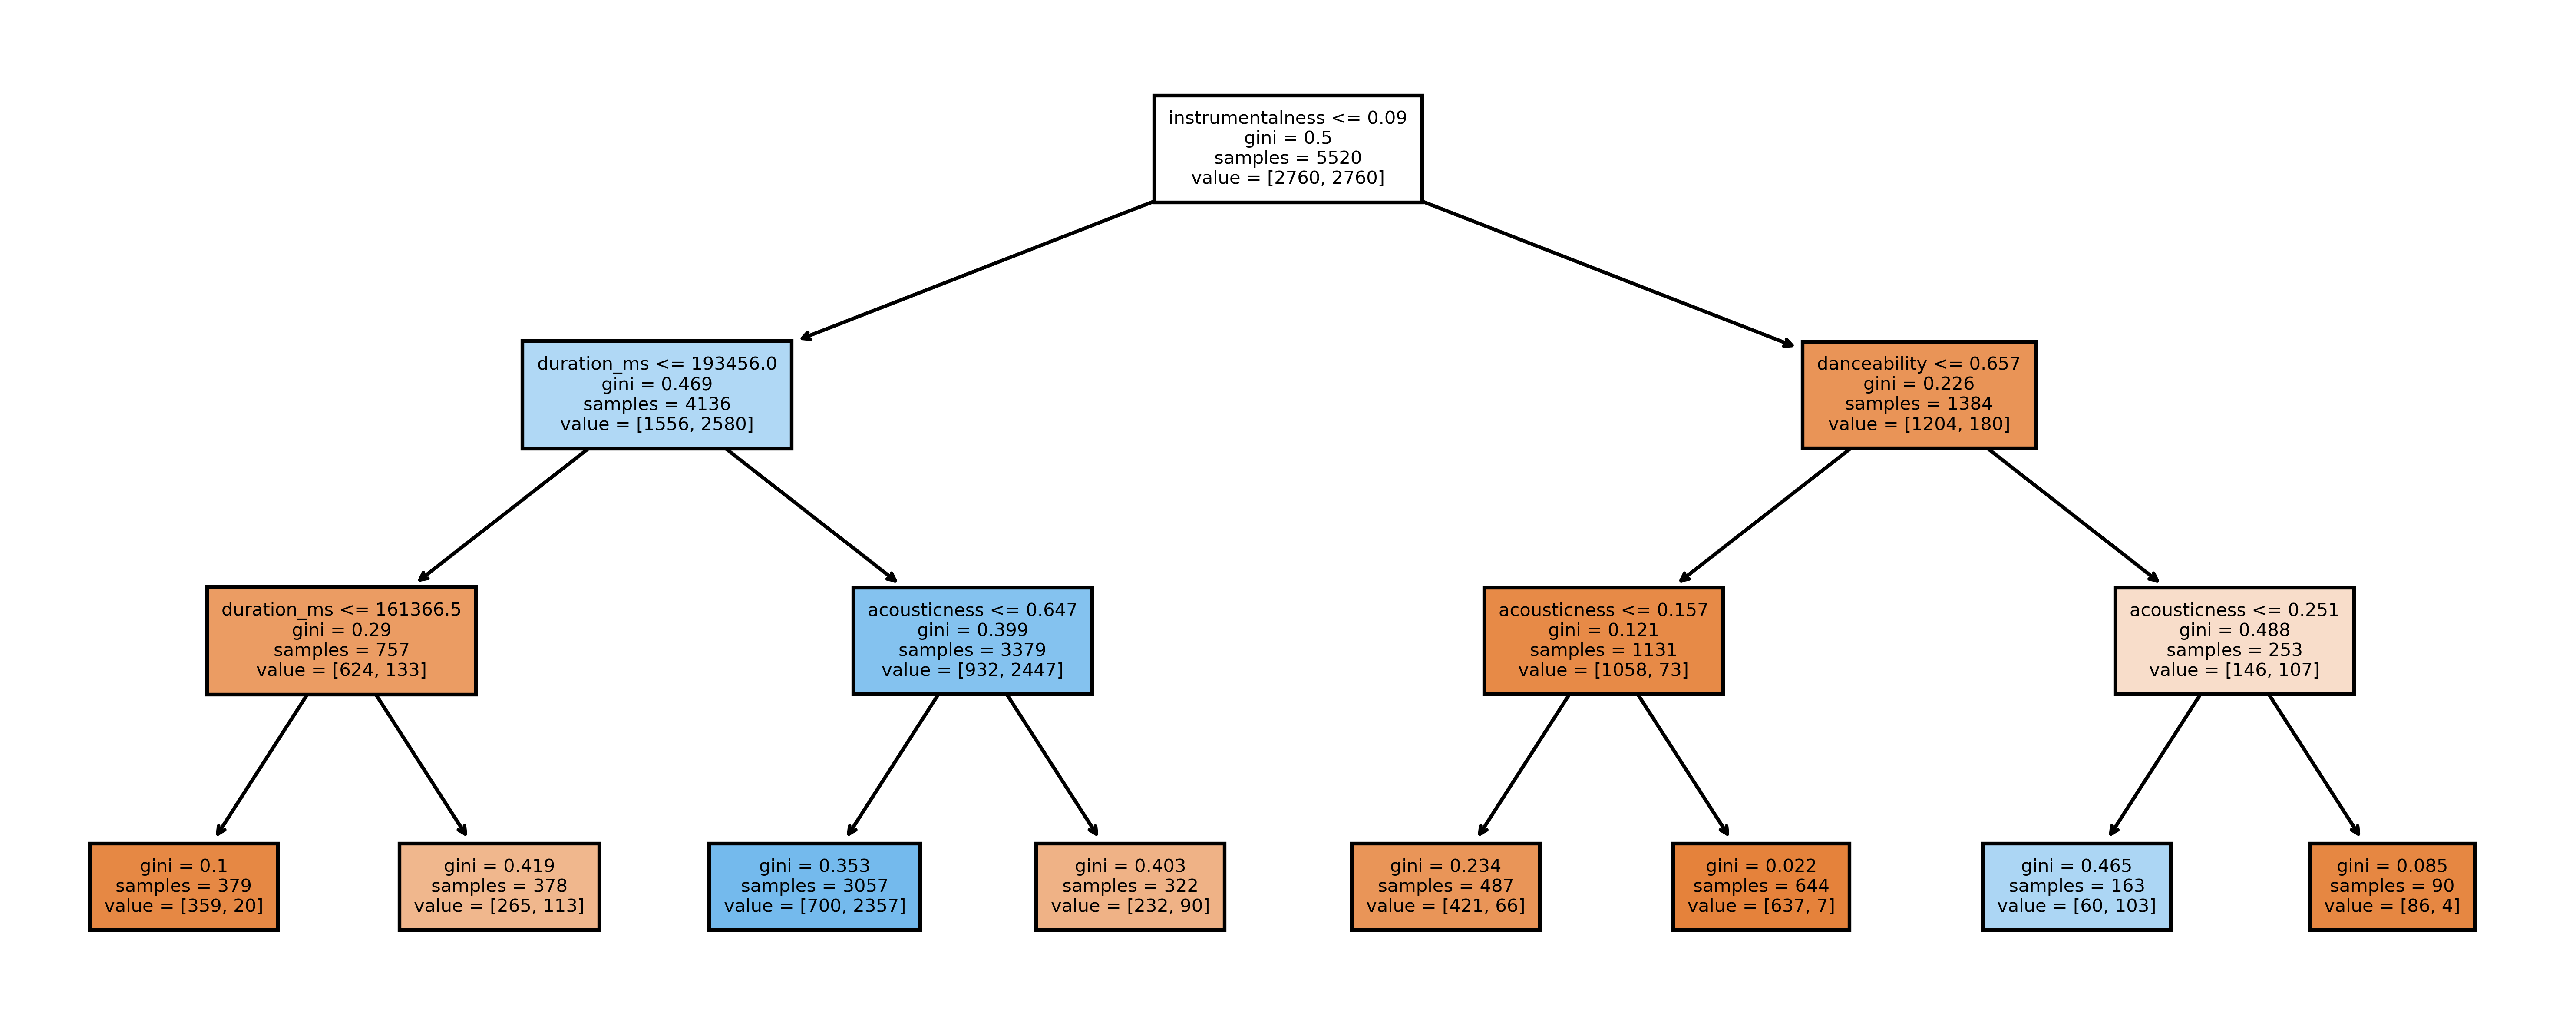

In [77]:
tree = DecisionTreeClassifier(max_depth = 3, ccp_alpha = 0.0009)
tree = tree.fit(X, y)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (12.5,5), dpi=600)
plot_tree(tree, filled = True, fontsize= 5, feature_names=X.columns, max_depth= 3)
fig.savefig('imagename.png')

# PCA

In [78]:
X_train

,danceability,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,chorus_hit,sections,year
0,0.578,4,-7.270,1,0.0289,0.368000,0.000000,0.159,0.532,133.061,196707,4,30.88059,13,2000
1,0.704,10,-5.477,0,0.1830,0.018500,0.000000,0.148,0.688,92.988,242587,4,41.51106,10,2000
2,0.162,9,-3.009,1,0.0473,0.000111,0.004570,0.174,0.300,86.964,338893,4,65.32887,13,2000
3,0.188,4,-3.745,1,0.1660,0.000007,0.078400,0.192,0.333,148.440,255667,4,58.59528,9,2000
4,0.630,2,-4.353,1,0.0275,0.363000,0.000000,0.125,0.631,112.098,193760,4,22.62384,10,2000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8637,0.420,3,-11.689,1,0.1000,0.808000,0.879000,0.363,0.183,119.821,26244,4,0.00000,2,1960
8638,0.716,10,-5.727,0,0.2420,0.663000,0.000000,0.107,0.834,135.104,142987,4,28.34316,10,1960
8639,0.361,10,-22.663,1,0.0327,0.940000,0.000178,0.115,0.139,92.472,137200,4,56.63498,6,1960
8640,0.452,4,-7.821,0,0.1750,0.658000,0.000000,0.738,0.853,137.976,159107,3,28.24372,9,1960


In [79]:
len(X_train.columns)

15

In [80]:
pca = PCA(n_components=8)

In [81]:
PCA_train_x = pca.fit_transform(StandardScaler().fit_transform(X_train), y_train)
PCA_test_x = pca.transform(StandardScaler().fit_transform(X_test))

In [82]:
for label, clf in classifiers.items():  
    clf.fit(PCA_train_x, y_train)
    score = clf.score(PCA_test_x, y_test)
    print(label, score)

Dummy Classifier - Baseline -  0.5
decision tree 0.6452016255079712
pruned decision tree 0.6955298530790872
KNN with k=10 0.6555173491716161
KNN with k=15 0.6753673022819631
Gaussian NB 0.6894341981869334
random forest 0.7197561738043139
random forest smaller 0.7202250703344796
xgb 0.6694279462331979
logistic regression 0.7044388871522351
